# The Sparks Foundation
### Data Science and Business Analyst Intern [GRIPJUNE 2021]

## Prediction using Supervised ML (Task 1)
- Predicting result of Student based on number of hours they study.


## Author: Shubh Dholakiya

### Data Exploration
- Importing the dependencies and libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

- Importing the dataset

In [ ]:
file = "http://bit.ly/w-data"
df = pd.read_csv(file)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
df.tail(6)

,Hours,Scores
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [ ]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [ ]:
df.shape

(25, 2)

In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Data Visualization

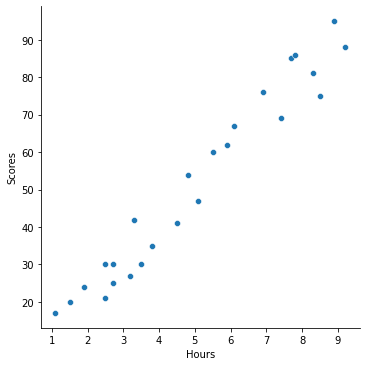

In [ ]:
sns.relplot(x=df.Hours, y=df.Scores)

In [ ]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


- From this graph we can say that we can use Linear Regression as there is a linear replationship between Hours and Scores.

### Train Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
train = df.iloc[:, :1].values
test = df.iloc[:,1:].values

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(train, test, test_size=0.25, random_state=0)

In [ ]:
regr = LinearRegression()

In [ ]:
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

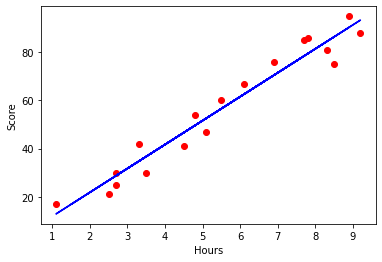

In [ ]:
line = regr.coef_*train + regr.intercept_

plt.scatter(X_train, Y_train, color='red')
plt.plot(train, line, color='blue')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

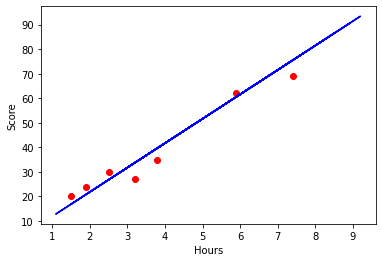

In [ ]:
plt.scatter(X_test, Y_test, color='red')
plt.plot(train, line, color='blue')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

In [ ]:
pred = regr.predict(X_test)

In [ ]:
pred

array([[16.84472176],
       [33.74557494],
       [75.50062397],
       [26.7864001 ],
       [60.58810646],
       [39.71058194],
       [20.8213931 ]])

In [ ]:
Y_test

array([[20],
       [27],
       [69],
       [30],
       [62],
       [35],
       [24]])

In [ ]:
regr.score(X_test, Y_test)

0.9367661043365056

In [ ]:
# Given vs Predicted
comp = pd.DataFrame({'Given':[Y_test], "Predicted":[pred]})
comp

,Given,Predicted
0,"[[20], [27], [69], [30], [62], [35], [24]]","[[16.844721762383802], [33.74557493951356], [7..."


In [ ]:
ran_predict = regr.predict([[9.25]])
print(ran_predict)

[[93.89272889]]


In [ ]:
from sklearn import metrics
print(metrics.mean_absolute_error(Y_test, pred))

4.130879918502482
